Day: Wed, 24th April, 2024<br>
Name: <b>SARTHAK KIRAN GIRME</b><br>
Roll No.: 23370<b>16</b>
# CNN Object Detection: Performance Metrics
## SL-2 Practical No. 10

<b>Statment: </b><i> Write Python program to implement `CNN Object Detection`. Discuss numerous `Performance EevaluationMmetric`s for evaluating the object detecting algorithms' performance.</i>
<hr>

## Packages

In [1]:
# pip install tensorflow

In [2]:
# pip install scikit-learn

In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, models, layers

<hr>

## Dataset: CIFAR10

In [4]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [5]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()   # this requires Internet for downloading

In [6]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

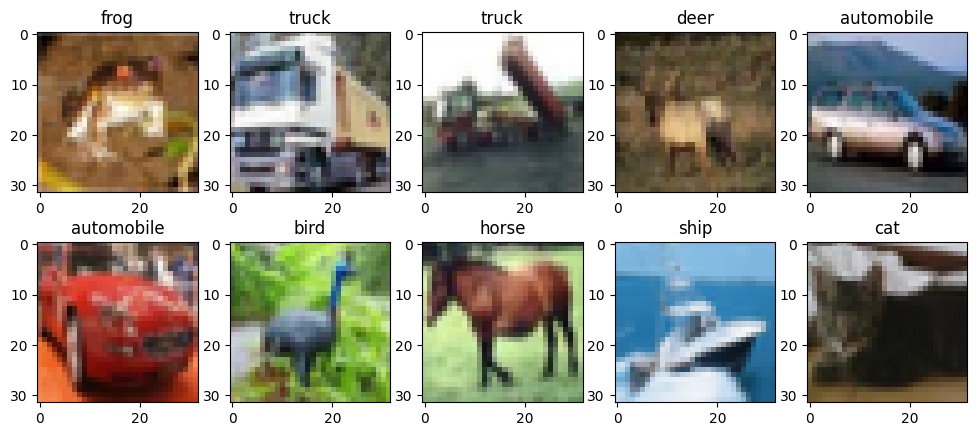

In [7]:
plt.figure(figsize=(12,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_train[i])
    plt.title(classes[y_train.reshape(-1,)[i]])

<hr>

## Normalization: Min-Max

In [8]:
x_train[111].flatten()

array([135, 160, 179, ..., 139, 139, 140], dtype=uint8)

In [9]:
x_train = x_train/255.0
x_test  = x_test/255.0

In [10]:
x_train[111].flatten()

array([0.52941176, 0.62745098, 0.70196078, ..., 0.54509804, 0.54509804,
       0.54901961])

<hr>

## Graphs: Generic code

In [11]:
def Graphs(accuracy, loss, val_accuracy, val_loss, epochs):
    # Create a figure and axis object
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    # Plot the first subplot (Training Accuracy)
    ax1.plot(epochs, accuracy, 'y', label='Training Accuracy')
    ax1.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
    ax1.set_title('Accuracy Graph')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.legend()
    # Plot the second subplot (Training Loss)
    ax2.plot(epochs, loss, 'y', label='Training Loss')
    ax2.plot(epochs, val_loss, 'r', label='Validation Loss')
    ax2.set_title('Loss Graph')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.legend()
    # Adjust layout
    plt.tight_layout()
    # Show the figure
    plt.show()

<hr>

## Model Building

In [12]:
model = models.Sequential([
    layers.Conv2D(64, (3,3), activation='relu', input_shape=(32, 32, 3)),
    layers.Dropout(0.2),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (4,4), activation='relu'),
    layers.Dropout(0.2),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (4,4), activation='relu'),
    layers.Flatten(),
    layers.Dense(64 , activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax'),
])

In [13]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### Model Training

In [14]:
history = model.fit(x_train, y_train, validation_split=0.2, batch_size= 32, epqochs=10)

Epoch 1/10
1250/1250 [==============================] - 14s 8ms/step - loss: 1.6283 - accuracy: 0.4007 - val_loss: 1.4225 - val_accuracy: 0.5088
Epoch 2/10
1250/1250 [==============================] - 9s 7ms/step - loss: 1.2593 - accuracy: 0.5508 - val_loss: 1.1523 - val_accuracy: 0.6069
Epoch 3/10
1250/1250 [==============================] - 9s 7ms/step - loss: 1.0978 - accuracy: 0.6131 - val_loss: 1.0996 - val_accuracy: 0.6115
Epoch 4/10
1250/1250 [==============================] - 9s 7ms/step - loss: 0.9956 - accuracy: 0.6549 - val_loss: 0.9822 - val_accuracy: 0.6643
Epoch 5/10
1250/1250 [==============================] - 9s 7ms/step - loss: 0.9194 - accuracy: 0.6796 - val_loss: 0.9249 - val_accuracy: 0.6859
Epoch 6/10
1250/1250 [==============================] - 9s 7ms/step - loss: 0.8508 - accuracy: 0.7018 - val_loss: 0.9031 - val_accuracy: 0.6897
Epoch 7/10
1250/1250 [==============================] - 9s 7ms/step - loss: 0.7927 - accuracy: 0.7215 - val_loss: 0.8561 - val_accuracy

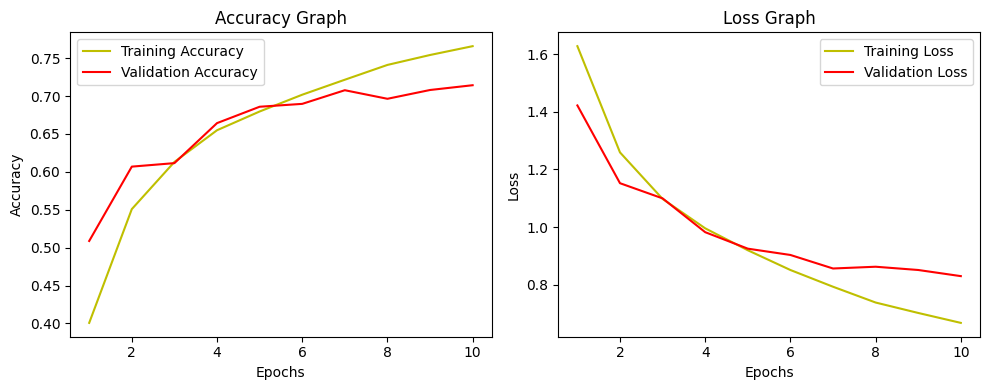

In [15]:
Graphs(history.history['accuracy'], history.history['loss'], history.history['val_accuracy'], history.history['val_loss'], range(1, len(history.history['accuracy'])+1))

<hr>

## Performance Evaluation

In [ ]:
# On Test-Set
loss, accu = model.evaluate(x_test, y_test)
print('Accuracy: ',accu*100,'%')
print('Loss: ', loss)

#### Classification Report: on Test-Set

In [22]:
prob = model.predict(x_test)
predi = [np.argmax(i) for i in oi]
print(classification_report(y_test, predi))

313/313 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0       0.77      0.72      0.74      1000
           1       0.87      0.79      0.83      1000
           2       0.57      0.65      0.61      1000
           3       0.48      0.59      0.53      1000
           4       0.65      0.66      0.65      1000
           5       0.72      0.47      0.57      1000
           6       0.67      0.86      0.76      1000
           7       0.90      0.64      0.75      1000
           8       0.77      0.88      0.82      1000
           9       0.82      0.79      0.81      1000

    accuracy                           0.71     10000
   macro avg       0.72      0.71      0.71     10000
weighted avg       0.72      0.71      0.71     10000



<hr>

## Save Model: CIFAR10

In [23]:
model.save('CIFAR10.h5')

<hr>

## Object Detection

In [24]:
model = models.load_model('CIFAR10.h5')

In [32]:
def ObjectDetection(threshold):
    path = str(input('Enter path of Image: '))
    img  = tf.io.read_file(path)
    img  = tf.image.decode_jpeg(img, channels=3)
    plt.imshow(img)
    img  = tf.image.resize(img, [32,32])
    img  = img / 255.0
    img  = tf.expand_dims(img, axis=0)
    # Model: Object Detection
    probabilities = model.predict(img)
    class_indices = [i for i, prob in enumerate(probabilities.reshape(-1,)) if prob>=threshold]
    label= [classes[i] for i in class_indices]
    print(f"\u2022 Detected Objects: {label}")

Enter path of Image:  Datasets/cat.jpeg


1/1 [==============================] - 0s 27ms/step
• Detected Objects: ['cat']


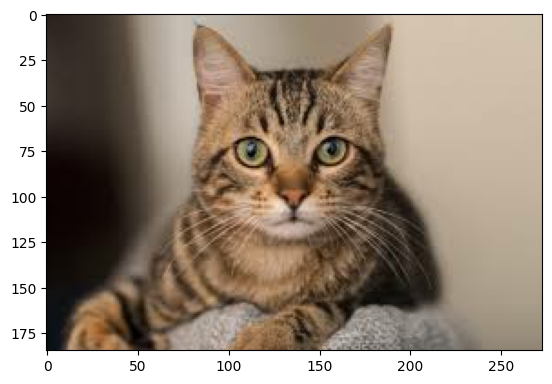

In [33]:
ObjectDetection(0.5)

Enter path of Image:  Datasets/plane_ship.jpg


1/1 [==============================] - 0s 25ms/step
• Detected Objects: ['airplane', 'ship']


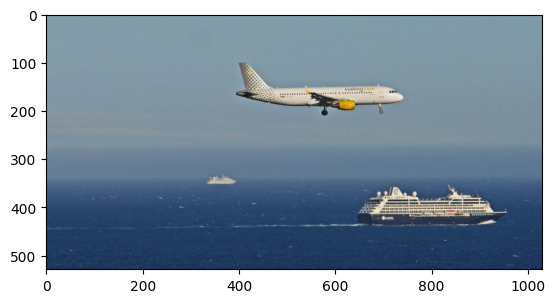

In [43]:
ObjectDetection(0.1)

Enter path of Image:  Datasets/horse_deer.jpg


1/1 [==============================] - 0s 27ms/step
• Detected Objects: ['deer', 'horse']


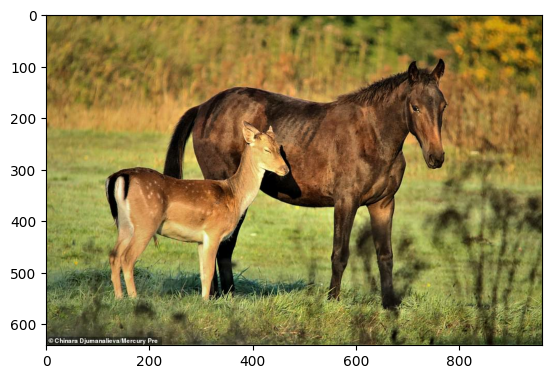

In [47]:
ObjectDetection(0.09)

<hr>